In [1]:
import matplotlib.pyplot as plt
import numpy as np

gen_results = np.load('/Users/isaaclee/discovery_results/generated_mean_std.npz')
gen_samples = np.load('/Users/isaaclee/discovery_results/generated_samples.npz')
real_samples = np.load('/Users/isaaclee/discovery_results/real_samples.npz')

print(gen_results.files)
print(gen_samples.files)
print(real_samples.files)

['array1', 'array2']
['arr_0']
['arr_0']


In [2]:
# Calculating Mean Absolute Error
real = real_samples['arr_0']
pred = gen_results['array1']
print(real.shape)
print(pred.shape)

mae = np.mean(np.abs(real-pred))
print("Mean Absolute Error: " + str(mae))


(1200, 1)
(1200, 1)
Mean Absolute Error: 0.04053448680583339


(1200, 1)
(1200, 1)


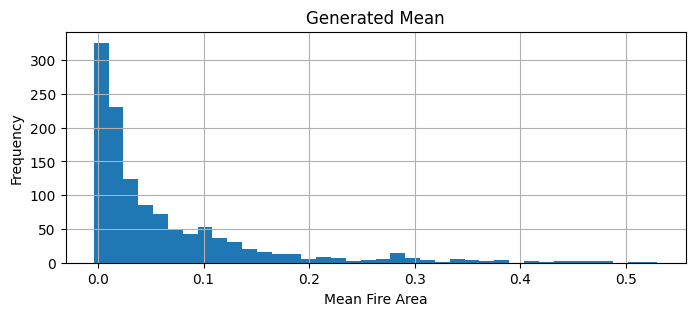

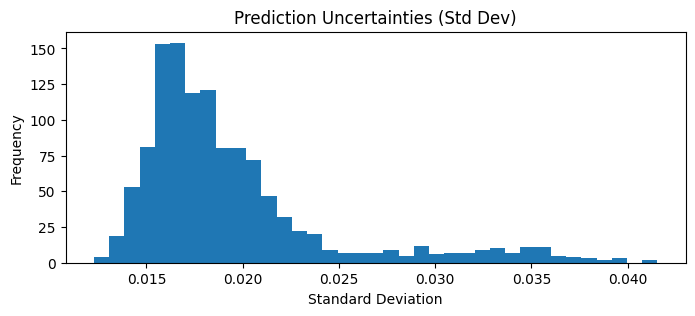

In [3]:
# Plotting the generated mean and std

means = gen_results['array1']
stds = gen_results['array2']

print(means.shape)
print(stds.shape)

plt.figure(figsize=(8,3))
plt.title('Generated Mean')
plt.hist(means, bins='auto')
plt.xlabel('Mean Fire Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

pred_stds = gen_results['array2']
plt.figure(figsize=(8,3))
plt.hist(pred_stds, bins='auto')
plt.title("Prediction Uncertainties (Std Dev)")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.show()

(1200000,)
(1200,)


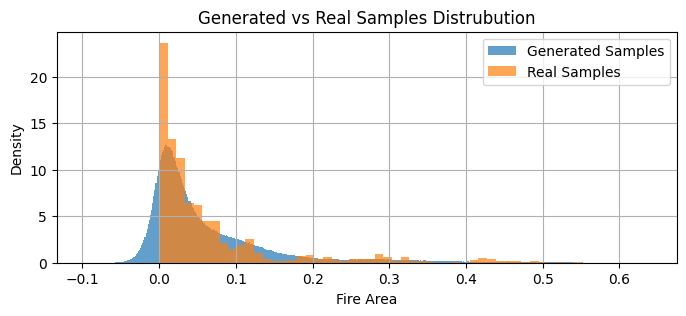

In [4]:
gen = gen_samples['arr_0'].flatten()
real = real_samples['arr_0'].flatten()

print(gen.shape)
print(real.shape)

plt.figure(figsize=(8,3))
plt.title('Generated vs Real Samples Distrubution')
plt.hist(gen, bins='auto', alpha=0.7, label='Generated Samples', density=True)
plt.hist(real, bins='auto', alpha=0.7, label='Real Samples', density=True)
plt.legend()
plt.xlabel('Fire Area')
plt.ylabel('Density')
plt.grid(True)
plt.show()

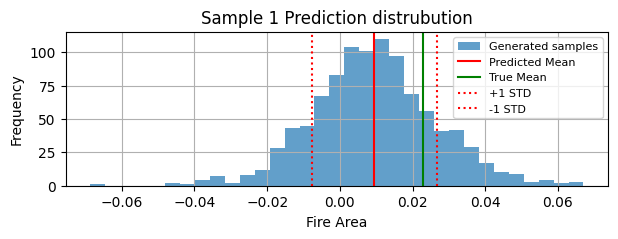

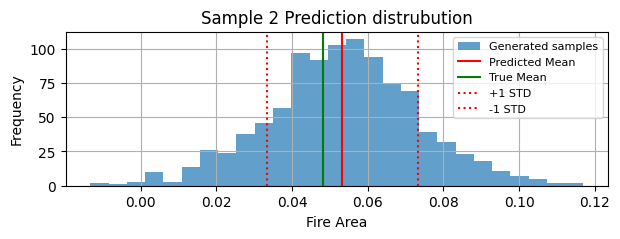

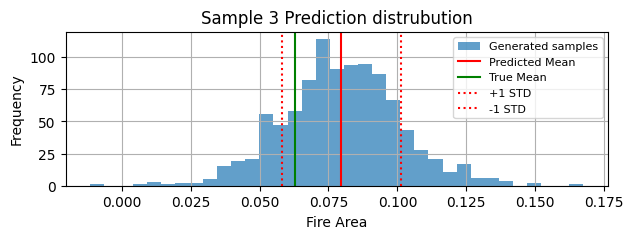

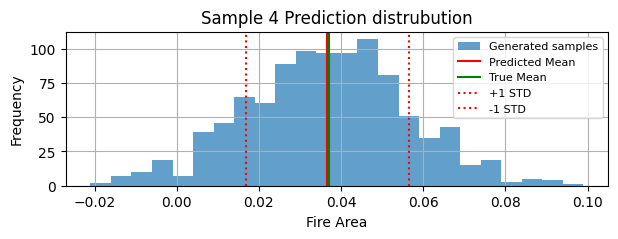

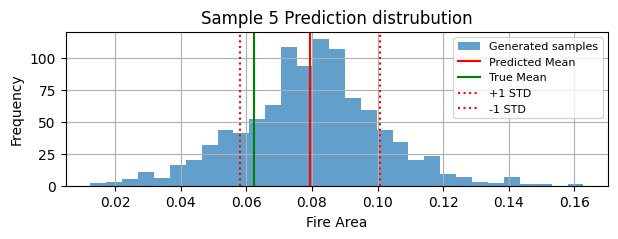

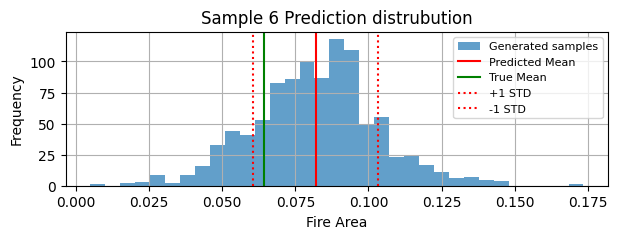

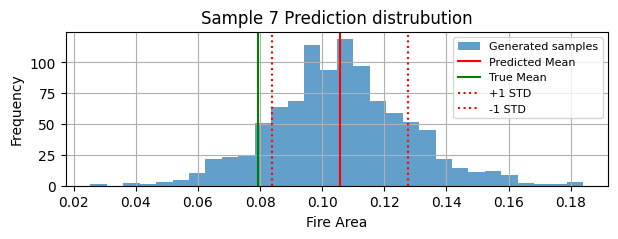

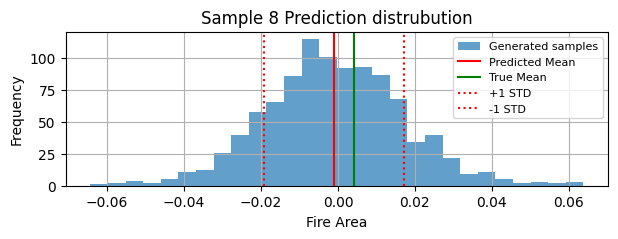

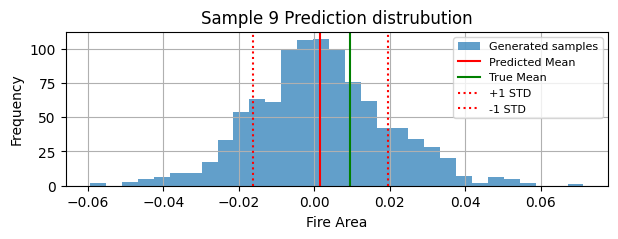

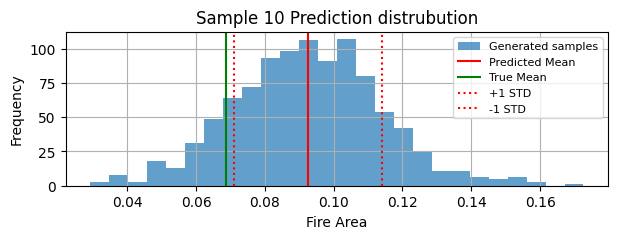

In [ ]:
gen_all = gen_samples['arr_0'].reshape(1200, 1000)
means = gen_results['array1']
stds = gen_results['array2']
real = real_samples['arr_0']

for i in range(10):  # Plot for first 10 test points
    plt.figure(figsize=(7,2))
    plt.title('Sample ' + str(i+1) + ' Prediction Distribution')
    plt.hist(gen_all[i], bins='auto', alpha=0.7, label='Generated samples') 
    plt.xlabel('Fire Area')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.axvline(means[i], color='red', label='Predicted Mean')
    plt.axvline(real[i], color='green', label='True Mean')
    plt.axvline(means[i]+stds[i], color='red', label='+1 STD', linestyle=':')
    plt.axvline(means[i]-stds[i], color='red', label='-1 STD', linestyle=':')
    plt.legend(fontsize='8')
    plt.show()